In [1]:
import pyarrow
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df_2023=pd.read_parquet('/content/drive/MyDrive/output_file.parquet')

In [4]:
df_2023.columns

Index(['STATE', 'MONTH', 'M_EXP_FOOD', 'SIZE_GROUP', 'AGE_GROUP',
       'GENDER_GROUP', 'EDU_GROUP', 'OCCUPATION_GROUP', 'REGION_TYPE',
       'TOT_INC', 'INC_OF_HH_FRM_SELF_PRODN', 'INC_OF_HH_FRM_PVT_TRF',
       'Month_Name', 'YEAR'],
      dtype='object')

In [5]:
df_2023.head()

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR
0,Jammu & Kashmir,Jan 2023,12440.0,4 Members,Balanced households with Seniors,Male Dominated,Graduates majority household,Retired/Aged,RURAL,29180,2100,0,Jan,2023
1,Jammu & Kashmir,Jan 2023,15870.0,4 Members,Balanced households with no Seniors,Male Dominated,Graduates majority household,White-collar Professional Employees,RURAL,60600,2600,0,Jan,2023
2,Jammu & Kashmir,Jan 2023,11390.0,4 Members,Balanced households with no Seniors,Balanced,Households of all literates,Wage Labourers,RURAL,29900,2500,0,Jan,2023
3,Jammu & Kashmir,Jan 2023,9840.0,5 Members,Youngsters - dominant,Male Dominated,Households of all literates,Wage Labourers,RURAL,22500,3500,0,Jan,2023
4,Jammu & Kashmir,Jan 2023,10510.0,4 Members,Grown-up - dominant,Balanced,Matriculates minority household,Self-employed Entrepreneurs,RURAL,27900,2500,0,Jan,2023


In [6]:
df_2023.sort_values(by=['M_EXP_FOOD'], inplace=True)  # Sorting in ascending order
df_2023= df_2023[df_2023['M_EXP_FOOD'] > 0].copy()# Keeping only values greater than 0
df_2023['log_M_EXP_FOOD']= np.log(df_2023['M_EXP_FOOD']) #creating log

In [7]:
import numpy as np
df_2023.sort_values(by=['TOT_INC'], inplace=True)
df_2023 = df_2023[df_2023['TOT_INC'] > 0].copy()

# Apply log(1 + x) transformation
df_2023['log_income'] = np.log1p(df_2023['TOT_INC'])


In [8]:
df_2023.head()

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income
1399686,Bihar,Aug 2023,445.0,5 Members,Youngsters - dominant,Male Majority,Matriculates majority household,Small/Marginal Farmers,RURAL,8,0,0,Aug,2023,6.098074,2.197225
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,Organised Farmers,RURAL,8,0,0,Aug,2023,8.855093,2.197225
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,Retired/Aged,RURAL,14,0,0,Jan,2023,7.789455,2.708050
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,Mar,2023,8.711114,3.044522
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,May,2023,8.581107,3.044522


In [9]:
#checking missing values and data type
print("\nData Types and Missing Values:\n",print(df_2023.info()))

<class 'pandas.core.frame.DataFrame'>
Index: 1278876 entries, 1399686 to 728744
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   STATE                     1278876 non-null  object 
 1   MONTH                     1278876 non-null  object 
 2   M_EXP_FOOD                1278876 non-null  float64
 3   SIZE_GROUP                1278876 non-null  object 
 4   AGE_GROUP                 1278876 non-null  object 
 5   GENDER_GROUP              1278876 non-null  object 
 6   EDU_GROUP                 1278876 non-null  object 
 7   OCCUPATION_GROUP          1278876 non-null  object 
 8   REGION_TYPE               1278876 non-null  object 
 9   TOT_INC                   1278876 non-null  int32  
 10  INC_OF_HH_FRM_SELF_PRODN  1278876 non-null  int32  
 11  INC_OF_HH_FRM_PVT_TRF     1278876 non-null  int32  
 12  Month_Name                1278876 non-null  object 
 13  YEAR                      1

In [10]:
import pandas as pd
from scipy.stats import skew

skewness = skew(df_2023['log_M_EXP_FOOD'])

print(f"Skewness of {'log_M_EXP_FOOD'}: {skewness:.2f}")

Skewness of log_M_EXP_FOOD: -0.27


In [11]:
import pandas as pd
from scipy.stats import skew


skewness = skew(df_2023['log_income'])

print(f"Skewness of {'log_income'}: {skewness:.2f}")

Skewness of log_income: -1.39


In [12]:
df_2023.isnull().sum()
#checking null values

,0
STATE,0
MONTH,0
M_EXP_FOOD,0
SIZE_GROUP,0
AGE_GROUP,0
GENDER_GROUP,0
EDU_GROUP,0
OCCUPATION_GROUP,0
REGION_TYPE,0
TOT_INC,0


In [13]:
df_2023.dropna()  # Droping any row with missing values


,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income
1399686,Bihar,Aug 2023,445.0,5 Members,Youngsters - dominant,Male Majority,Matriculates majority household,Small/Marginal Farmers,RURAL,8,0,0,Aug,2023,6.098074,2.197225
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,Organised Farmers,RURAL,8,0,0,Aug,2023,8.855093,2.197225
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,Retired/Aged,RURAL,14,0,0,Jan,2023,7.789455,2.708050
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,Mar,2023,8.711114,3.044522
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,May,2023,8.581107,3.044522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825296,Telangana,May 2023,10455.0,5 Members,Youngsters - dominant,Male Dominated,Households of all literates,Self-employed Entrepreneurs,URBAN,1628000,0,0,May,2023,9.254836,14.302863
1110571,Uttar Pradesh,Jul 2023,8560.0,2 Members,Grown-up - dominant,Balanced,All Matriculates household,White-collar Professional Employees,URBAN,2605000,0,0,Jul,2023,9.054855,14.772944
1445881,Delhi,Sep 2023,20980.0,2 Members,Grown-up - dominant,Balanced,Graduates majority household,Self-employed Entrepreneurs,URBAN,2650000,0,0,Sep,2023,9.951325,14.790071
2004295,Haryana,Dec 2023,8800.0,3 Members,Grown-up - dominant,Female Majority,All Matriculates household,Wage Labourers,RURAL,3353333,0,0,Dec,2023,9.082507,15.025466


In [14]:
Q1 = df_2023['log_M_EXP_FOOD'].quantile(0.25)
Q3 = df_2023['log_M_EXP_FOOD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_cleaned = df_2023[(df_2023['log_M_EXP_FOOD'] >= lower_bound) & (df_2023['log_M_EXP_FOOD'] <= upper_bound)]


In [15]:
df_cleaned

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,Organised Farmers,RURAL,8,0,0,Aug,2023,8.855093,2.197225
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,Retired/Aged,RURAL,14,0,0,Jan,2023,7.789455,2.708050
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,Mar,2023,8.711114,3.044522
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,May,2023,8.581107,3.044522
464605,Andhra Pradesh,Mar 2023,7630.0,4 Members,Balanced households with no Seniors,Balanced,All Matriculates household,Organised Farmers,RURAL,30,0,0,Mar,2023,8.939843,3.433987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648109,Telangana,Apr 2023,7455.0,4 Members,Balanced households with no Seniors,Balanced,Households of all literates,Organised Farmers,RURAL,1581300,1300,0,Apr,2023,8.916640,14.273758
825296,Telangana,May 2023,10455.0,5 Members,Youngsters - dominant,Male Dominated,Households of all literates,Self-employed Entrepreneurs,URBAN,1628000,0,0,May,2023,9.254836,14.302863
1110571,Uttar Pradesh,Jul 2023,8560.0,2 Members,Grown-up - dominant,Balanced,All Matriculates household,White-collar Professional Employees,URBAN,2605000,0,0,Jul,2023,9.054855,14.772944
2004295,Haryana,Dec 2023,8800.0,3 Members,Grown-up - dominant,Female Majority,All Matriculates household,Wage Labourers,RURAL,3353333,0,0,Dec,2023,9.082507,15.025466


In [16]:
df_cleaned.to_parquet('cleaned_file.parquet', index=False)
#saving cleaned data to a parquet

In [17]:
df_cleaned.head()

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,Organised Farmers,RURAL,8,0,0,Aug,2023,8.855093,2.197225
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,Retired/Aged,RURAL,14,0,0,Jan,2023,7.789455,2.708050
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,Mar,2023,8.711114,3.044522
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,May,2023,8.581107,3.044522
464605,Andhra Pradesh,Mar 2023,7630.0,4 Members,Balanced households with no Seniors,Balanced,All Matriculates household,Organised Farmers,RURAL,30,0,0,Mar,2023,8.939843,3.433987


Descriptive Statistics

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
quantitative_vars=['log_M_EXP_FOOD','log_income','INC_OF_HH_FRM_SELF_PRODN','INC_OF_HH_FRM_PVT_TRF']
# Focus only on the quantitative variables already defined
df_quant = df_cleaned[quantitative_vars]

# Create a detailed stats table
desc_stats = pd.DataFrame({
    'count': df_quant.count(),
    'missing': df_quant.isnull().sum(),
    'unique': df_quant.nunique(),
    'mean': df_quant.mean(),
    'median': df_quant.median(),
    'std': df_quant.std(),
    'var': df_quant.var(),
    'min': df_quant.min(),
    '25%': df_quant.quantile(0.25),
    '50%': df_quant.quantile(0.50),
    '75%': df_quant.quantile(0.75),
    'max': df_quant.max(),
    'range': df_quant.max() - df_quant.min(),
    'iqr': df_quant.apply(iqr),
    'skewness': df_quant.skew(),
    'kurtosis': df_quant.kurtosis()
})

# Format for better readability
desc_stats = desc_stats.round(3)

# Display
desc_stats

,count,missing,unique,mean,median,std,var,min,25%,50%,75%,max,range,iqr,skewness,kurtosis
log_M_EXP_FOOD,1258380,0,13429,8.748,8.756,0.352,0.124,7.774,8.511,8.756,8.988,9.720,1.946,0.477,-0.079,-0.188
log_income,1258380,0,34824,9.924,9.954,0.818,0.669,2.197,9.587,9.954,10.374,15.339,13.141,0.787,-1.452,6.514
INC_OF_HH_FRM_SELF_PRODN,1258380,0,1971,351.354,0.000,1203.768,1449057.631,0.000,0.000,0.000,0.000,250000.000,250000.000,0.000,38.510,5376.995
INC_OF_HH_FRM_PVT_TRF,1258380,0,969,639.832,0.000,2962.225,8774776.132,0.000,0.000,0.000,0.000,857000.000,857000.000,0.000,30.610,6229.311


In [19]:
df_cleaned.shape

(1258380, 16)

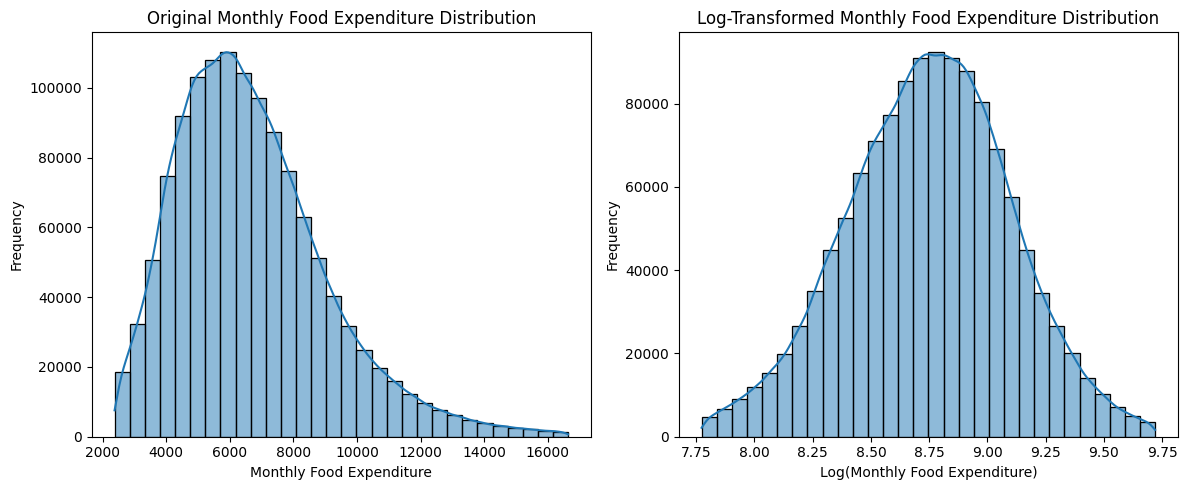

In [20]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.histplot(df_cleaned['M_EXP_FOOD'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original Monthly Food Expenditure Distribution")
axes[0].set_xlabel("Monthly Food Expenditure")
axes[0].set_ylabel("Frequency")

# Plot the transformed data
sns.histplot(df_cleaned['log_M_EXP_FOOD'], bins=30, kde=True)
plt.title("Log-Transformed Monthly Food Expenditure Distribution")
plt.xlabel("Log(Monthly Food Expenditure)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

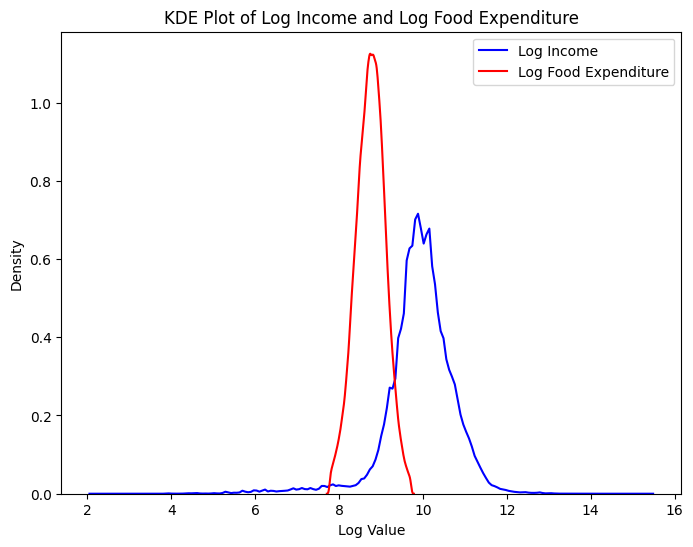

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_cleaned, x='log_income', label='Log Income', color='blue')
sns.kdeplot(data=df_cleaned, x='log_M_EXP_FOOD', label='Log Food Expenditure', color='red')
plt.title("KDE Plot of Log Income and Log Food Expenditure")
plt.xlabel("Log Value")  # Common x-axis label
plt.ylabel("Density")
plt.legend()
plt.show()

<ipython-input-22-928603173f68>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cleaned, x='REGION_TYPE', palette=colors, order=region_order)


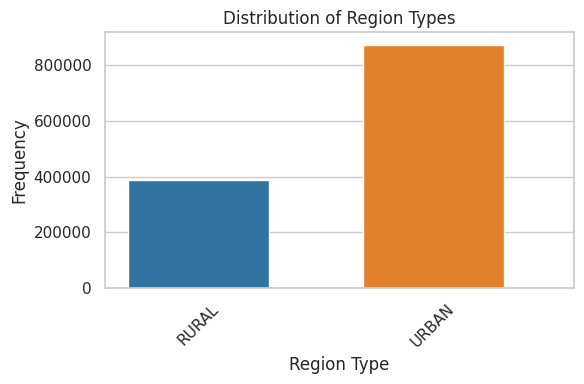

In [22]:
# Set a style
sns.set(style="whitegrid")

# Define custom colors
colors = {'RURAL': '#1f77b4', 'URBAN': '#ff7f0e'}  # Blue and Orange

# Sort region types
region_order = ['RURAL', 'URBAN'] if set(df_cleaned['REGION_TYPE']) == {'RURAL', 'URBAN'} else sorted(df_cleaned['REGION_TYPE'].unique())

# Create the plot with customizations
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_cleaned, x='REGION_TYPE', palette=colors, order=region_order)
plt.xlabel("Region Type")
plt.ylabel("Frequency")
plt.title("Distribution of Region Types")
plt.xticks(rotation=45, ha='right')

# Add gap between bars
for bar in ax.patches:
    bar.set_width(0.6)
plt.tight_layout()
plt.show()


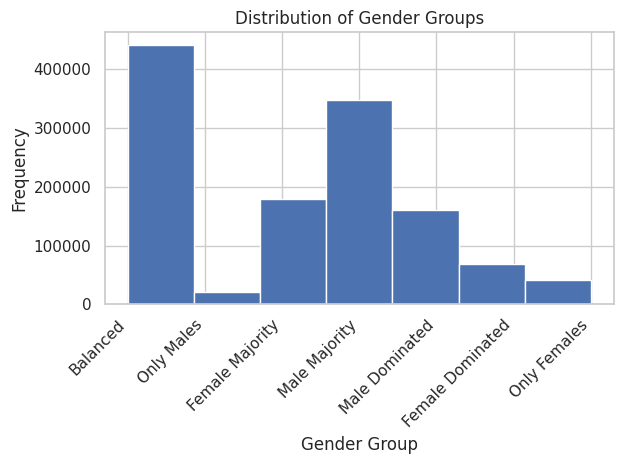

In [23]:
# Get unique gender groups for x-axis labels
gender_groups = df_cleaned['GENDER_GROUP'].unique()

# Create the histogram
plt.hist(df_cleaned['GENDER_GROUP'], bins=len(gender_groups))
plt.xticks(range(len(gender_groups)), gender_groups, rotation=45, ha='right')
plt.xlabel("Gender Group")
plt.ylabel("Frequency")
plt.title("Distribution of Gender Groups")
plt.tight_layout()
plt.show()

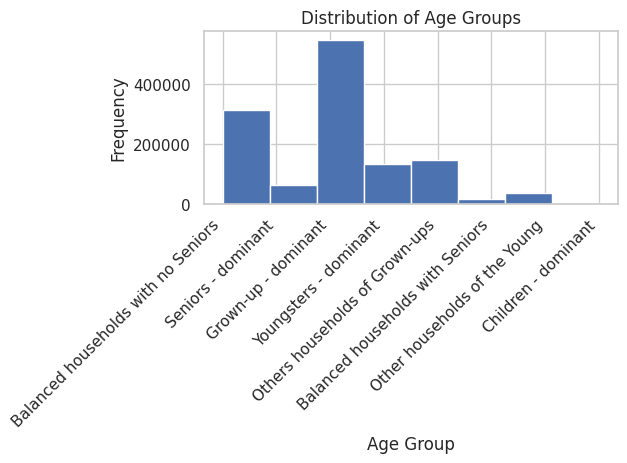

In [24]:

age_groups = df_cleaned['AGE_GROUP'].unique()
# Create the histogram
plt.hist(df_cleaned['AGE_GROUP'], bins=len(age_groups))
plt.xticks(range(len(age_groups)), age_groups, rotation=45, ha='right')
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Distribution of Age Groups")
plt.tight_layout()
plt.show()

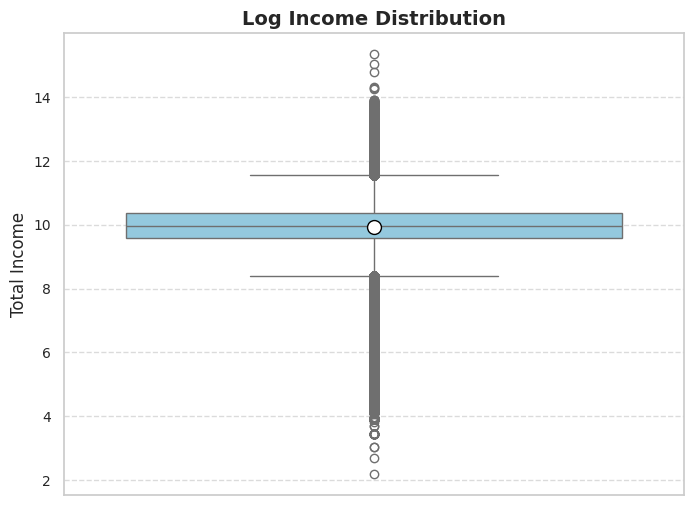

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['log_income'], color='skyblue', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
plt.title("Log Income Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Total Income", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

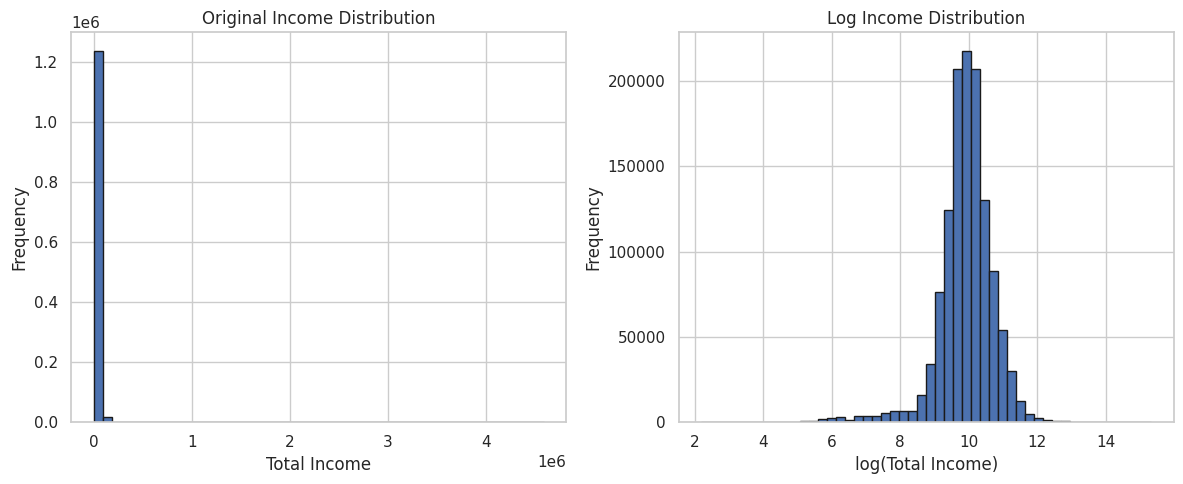

In [26]:
# 3. Plot the original vs. log-transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
axes[0].hist(df_cleaned['TOT_INC'], bins=50, edgecolor='k')
axes[0].set_title("Original Income Distribution")
axes[0].set_xlabel("Total Income")
axes[0].set_ylabel("Frequency")

# Log-transformed
axes[1].hist(df_cleaned['log_income'], bins=50, edgecolor='k')
axes[1].set_title("Log Income Distribution")
axes[1].set_xlabel("log(Total Income)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Correlation between log_income and log_M_EXP_FOOD: 0.420


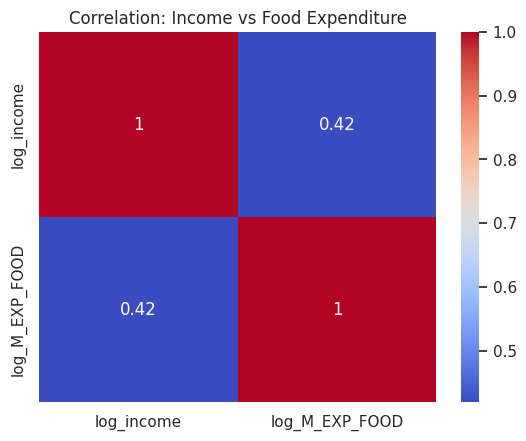

In [27]:
cols_of_interest = ['log_income', 'log_M_EXP_FOOD']
corr_value = df_cleaned[cols_of_interest].corr().iloc[0, 1]

print(f"Correlation between log_income and log_M_EXP_FOOD: {corr_value:.3f}")

# Optional: Visualize with heatmap
sns.heatmap(df_cleaned[cols_of_interest].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Income vs Food Expenditure')
plt.show()

Encoding

In [28]:
df_cleaned.head()

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,Organised Farmers,RURAL,8,0,0,Aug,2023,8.855093,2.197225
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,Retired/Aged,RURAL,14,0,0,Jan,2023,7.789455,2.708050
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,Mar,2023,8.711114,3.044522
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,Small/Marginal Farmers,RURAL,20,0,0,May,2023,8.581107,3.044522
464605,Andhra Pradesh,Mar 2023,7630.0,4 Members,Balanced households with no Seniors,Balanced,All Matriculates household,Organised Farmers,RURAL,30,0,0,Mar,2023,8.939843,3.433987


In [29]:
quantitative_vars = [	'M_EXP_FOOD','TOT_INC','log_income', 'log_M_EXP_FOOD', 'INC_OF_HH_FRM_SELF_PRODN', 'INC_OF_HH_FRM_PVT_TRF'
]
categorical_vars = [
    'STATE', 'REGION_TYPE', 'AGE_GROUP', 'OCCUPATION_GROUP', 'EDU_GROUP',
    'GENDER_GROUP', 'SIZE_GROUP', 'Month_Name'
]

In [30]:
df_cleaned.dtypes

,0
STATE,object
MONTH,object
M_EXP_FOOD,float64
SIZE_GROUP,object
AGE_GROUP,object
GENDER_GROUP,object
EDU_GROUP,object
OCCUPATION_GROUP,object
REGION_TYPE,object
TOT_INC,int32


In [31]:
import pandas as pd
# Cross-tabulation by gender and region
gender_region_crosstab = pd.crosstab(df_cleaned['GENDER_GROUP'], df_cleaned['REGION_TYPE'])
print("\nCross-tabulation by Gender and Region:\n", gender_region_crosstab)

# Cross-tabulation by gender and education
gender_edu_crosstab = pd.crosstab(df_cleaned['GENDER_GROUP'], df_cleaned['EDU_GROUP'])
print("\nCross-tabulation by Gender and Education:\n", gender_edu_crosstab)

# Cross-tabulation by region and education
region_edu_crosstab = pd.crosstab(df_cleaned['REGION_TYPE'], df_cleaned['EDU_GROUP'])
print("\nCross-tabulation by Region and Education:\n", region_edu_crosstab)


Cross-tabulation by Gender and Region:
 REGION_TYPE        RURAL   URBAN
GENDER_GROUP                    
Balanced          130244  310916
Female Dominated   20916   47053
Female Majority    57810  122028
Male Dominated     51412  109153
Male Majority     108152  238993
Only Females       11576   30023
Only Males          6108   13996

Cross-tabulation by Gender and Education:
 EDU_GROUP         All Graduates household  All Matriculates household  \
GENDER_GROUP                                                            
Balanced                            26440                       67370   
Female Dominated                     2928                        9572   
Female Majority                      8444                       23854   
Male Dominated                       6760                       25295   
Male Majority                       17630                       48109   
Only Females                         1945                        7199   
Only Males                        

In [32]:
categoricals = ['STATE', 'SIZE_GROUP','Month_Name', 'AGE_GROUP', 'GENDER_GROUP', 'EDU_GROUP', 'OCCUPATION_GROUP', 'REGION_TYPE']
for col in categoricals:
    print(f"\n{col} value counts:\n", df_cleaned[col].value_counts())



STATE value counts:
 STATE
Uttar Pradesh       190786
Maharashtra         145052
Rajasthan            96642
Karnataka            82852
Andhra Pradesh       74614
Tamil Nadu           70553
Madhya Pradesh       59062
Telangana            56965
Odisha               54041
West Bengal          50445
Bihar                48031
Kerala               47697
Punjab               45508
Haryana              44612
Chhattisgarh         41886
Gujarat              37795
Jharkhand            22182
Jammu & Kashmir      16996
Uttarakhand          12708
Delhi                11822
Meghalaya             8886
Puducherry            8525
Himachal Pradesh      6957
Sikkim                5811
Tripura               4880
Goa                   4824
Assam                 4491
Chandigarh            3757
Name: count, dtype: int64

SIZE_GROUP value counts:
 SIZE_GROUP
4 Members        370672
3 Members        333068
2 Members        235634
5 Members        175905
6 Members         69600
1 Member          36059
7 Member

In [33]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# List of categorical variables to encode
categorical_vars_to_encode = ['OCCUPATION_GROUP']

# Initialize and fit encoder
ordinal_encoder = OrdinalEncoder()
df_cleaned[categorical_vars_to_encode] = ordinal_encoder.fit_transform(df_cleaned[categorical_vars_to_encode]).astype(int)

# Get encoded values
df_cleaned['OCCUPATION_GROUP_encoded'] = df_cleaned['OCCUPATION_GROUP']

# Extract mapping from encoder
occupation_labels = ordinal_encoder.categories_[0]
occupation_mapping_df = pd.DataFrame({
    'OCCUPATION_GROUP_original': occupation_labels,
    'OCCUPATION_GROUP_encoded': range(len(occupation_labels))
})

print(occupation_mapping_df.to_string(index=False))

            OCCUPATION_GROUP_original  OCCUPATION_GROUP_encoded
               Agricultural Labourers                         0
        Business & Salaried Employees                         1
                        Entrepreneurs                         2
                   Home-based Workers                         3
                   Industrial Workers                         4
 Legislators/Social Workers/Activists                         5
                 Managers/Supervisors                         6
                        Miscellaneous                         7
   Non-industrial Technical Employees                         8
                    Organised Farmers                         9
Qualified Self-employed Professionals                        10
                         Retired/Aged                        11
          Self-employed Entrepreneurs                        12
                Small Traders/Hawkers                        13
               Small/Marginal Farmers   

<ipython-input-33-59326f2c6a4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_vars_to_encode] = ordinal_encoder.fit_transform(df_cleaned[categorical_vars_to_encode]).astype(int)
<ipython-input-33-59326f2c6a4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['OCCUPATION_GROUP_encoded'] = df_cleaned['OCCUPATION_GROUP']


In [34]:
df_cleaned.head()

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income,OCCUPATION_GROUP_encoded
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,9,RURAL,8,0,0,Aug,2023,8.855093,2.197225,9
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,11,RURAL,14,0,0,Jan,2023,7.789455,2.708050,11
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,14,RURAL,20,0,0,Mar,2023,8.711114,3.044522,14
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,14,RURAL,20,0,0,May,2023,8.581107,3.044522,14
464605,Andhra Pradesh,Mar 2023,7630.0,4 Members,Balanced households with no Seniors,Balanced,All Matriculates household,9,RURAL,30,0,0,Mar,2023,8.939843,3.433987,9


In [35]:
import pandas as pd

# Copy of the encoded DataFrame because occupational coding was interrupted once and was fixed.
df_cleaned1 = df_cleaned.copy()

# Drop 'OCCUPATION_GROUP_encoded' column
df_cleaned1 = df_cleaned1.drop(columns=['OCCUPATION_GROUP_encoded'], errors='ignore')
# errors='ignore' to avoid error if the column doesn't exist

# Your list of original categorical variables
categorical_vars = ['STATE', 'REGION_TYPE', 'AGE_GROUP', 'OCCUPATION_GROUP', 'EDU_GROUP', 'GENDER_GROUP', 'SIZE_GROUP']

# Reverse one-hot encoding
for var in categorical_vars:

    one_hot_cols = [col for col in df_cleaned1.columns if col.startswith(var + '_')]


    if one_hot_cols:

        df_cleaned1[var] = df_cleaned1[one_hot_cols].idxmax(axis=1).str.replace(var + '_', '')


        df_cleaned1.drop(columns=one_hot_cols, inplace=True)
    else:
        print(f"No one-hot columns found for variable: {var}")

No one-hot columns found for variable: STATE
No one-hot columns found for variable: REGION_TYPE
No one-hot columns found for variable: AGE_GROUP
No one-hot columns found for variable: OCCUPATION_GROUP
No one-hot columns found for variable: EDU_GROUP
No one-hot columns found for variable: GENDER_GROUP
No one-hot columns found for variable: SIZE_GROUP


In [36]:
df_cleaned1.head()

,STATE,MONTH,M_EXP_FOOD,SIZE_GROUP,AGE_GROUP,GENDER_GROUP,EDU_GROUP,OCCUPATION_GROUP,REGION_TYPE,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,log_M_EXP_FOOD,log_income
1326177,Maharashtra,Aug 2023,7010.0,4 Members,Balanced households with no Seniors,Balanced,Matriculates majority household,9,RURAL,8,0,0,Aug,2023,8.855093,2.197225
74661,Maharashtra,Jan 2023,2415.0,1 Member,Seniors - dominant,Only Males,Households of all literates,11,RURAL,14,0,0,Jan,2023,7.789455,2.708050
428829,Maharashtra,Mar 2023,6070.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,14,RURAL,20,0,0,Mar,2023,8.711114,3.044522
785232,Maharashtra,May 2023,5330.0,2 Members,Balanced households with no Seniors,Balanced,Households of all literates,14,RURAL,20,0,0,May,2023,8.581107,3.044522
464605,Andhra Pradesh,Mar 2023,7630.0,4 Members,Balanced households with no Seniors,Balanced,All Matriculates household,9,RURAL,30,0,0,Mar,2023,8.939843,3.433987


In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [38]:
#specifying the columns
onehot_cols = [ 'SIZE_GROUP','REGION_TYPE','AGE_GROUP','GENDER_GROUP']
ordinal_cols = ['STATE','EDU_GROUP', 'OCCUPATION_GROUP','Month_Name']

In [39]:
# One-hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=onehot_cols, drop_first=False)

In [40]:
# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_encoded[ordinal_cols]).astype(int)

In [41]:
# Save mapping for reversal
ordinal_mappings = {
    col: labels for col, labels in zip(ordinal_cols, ordinal_encoder.categories_)
}

In [42]:
df_encoded.head()

,STATE,MONTH,M_EXP_FOOD,EDU_GROUP,OCCUPATION_GROUP,TOT_INC,INC_OF_HH_FRM_SELF_PRODN,INC_OF_HH_FRM_PVT_TRF,Month_Name,YEAR,...,AGE_GROUP_Others households of Grown-ups,AGE_GROUP_Seniors - dominant,AGE_GROUP_Youngsters - dominant,GENDER_GROUP_Balanced,GENDER_GROUP_Female Dominated,GENDER_GROUP_Female Majority,GENDER_GROUP_Male Dominated,GENDER_GROUP_Male Majority,GENDER_GROUP_Only Females,GENDER_GROUP_Only Males
1326177,15,Aug 2023,7010.0,9,9,8,0,0,1,2023,...,False,False,False,True,False,False,False,False,False,False
74661,15,Jan 2023,2415.0,6,11,14,0,0,4,2023,...,False,True,False,False,False,False,False,False,False,True
428829,15,Mar 2023,6070.0,6,14,20,0,0,7,2023,...,False,False,False,True,False,False,False,False,False,False
785232,15,May 2023,5330.0,6,14,20,0,0,8,2023,...,False,False,False,True,False,False,False,False,False,False
464605,0,Mar 2023,7630.0,1,9,30,0,0,7,2023,...,False,False,False,True,False,False,False,False,False,False


MODELING

In [43]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['log_M_EXP_FOOD', 'MONTH'])
y = df_encoded['log_M_EXP_FOOD']  # Replace accordingly

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100,
)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [46]:
y_pred = lr_model.predict(X_test)
#linear regression

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 0.01
R² Score: 0.95


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify categorical vs. numeric columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Build a ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeRegressor(
        max_depth = 4,
        criterion='squared_error',
        random_state=42
    ))
])

# Fit the pipeline on training data
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  []),
                                                 ('num', StandardScaler(),
                                                  ['STATE', 'M_EXP_FOOD',
                                                   'EDU_GROUP',
                                                   'OCCUPATION_GROUP',
                                                   'Month_Name', 'YEAR',
                                                   'log_income',
                                                   'OCCUPATION_GROUP_encoded'])])),
                ('clf', DecisionTreeRegressor(max_depth=4, random_state=42))])

In [50]:
print(f"Tree Depth: {tree_pipeline.named_steps['clf'].get_depth()}")
print(f"Number of Leaves: {tree_pipeline.named_steps['clf'].get_n_leaves()}")

Tree Depth: 4
Number of Leaves: 16


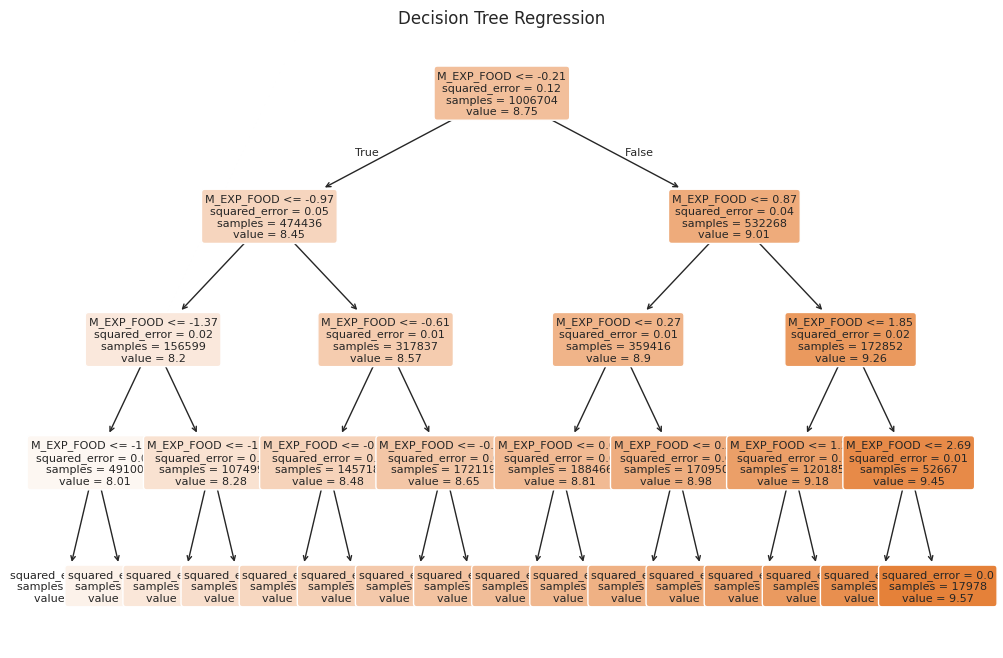

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X_train.columns

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(
    tree_pipeline.named_steps['clf'],
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8,
    precision=2  #  To adjust the Number of decimal places for values
)
plt.title("Decision Tree Regression")
plt.show()

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_model = RandomForestRegressor(random_state=100)
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=100))
])

pipeline_rf.fit(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
(pipeline_rf, X_test, y_test)

Mean Squared Error: 0.01
R² Score: 0.95


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('cat',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore'),
                                                   []),
                                                  ('num', StandardScaler(),
                                                   ['STATE', 'M_EXP_FOOD',
                                                    'EDU_GROUP',
                                                    'OCCUPATION_GROUP',
                                                    'Month_Name', 'YEAR',
                                                    'log_income',
                                                    'OCCUPATION_GROUP_encoded'])])),
                 ('regressor',
                  RandomForestRegressor(max_depth=10, n_jobs=-1,
                                        random_state=100))]),
          S

In [ ]:
y_pred_rf = rf_model.predict(X_test)

IndexError: list index out of range

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse:.2f}")
print(f"Random Forest - R² Score: {r2:.2f}"

In [ ]:
!pip install catboost  #installing catBoost
import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a CatBoostRegressor object
catboost_model = cb.CatBoostRegressor(
    iterations=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size at each iteration
    depth=6,  # Depth of the trees
    loss_function='RMSE',  # Loss function for regression
    random_seed=42,  # For reproducibility
    verbose=10, # Print progress every 10 iterations
)

# 2. Train the model
catboost_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# 4. Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - Mean Squared Error: {mse_catboost:.2f}")
print(f"CatBoost - R² Score: {r2_catboost:.2f}")

In [ ]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100,
)
def evaluate_model(model, model_name):
    # Record training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    # Record testing/inference time
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    test_time = end_test - start_test

    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Train Time: {train_time:.4f} seconds")
    print(f"Test Time: {test_time:.4f} seconds")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

# Models
models = [
    (LinearRegression(), "Linear Regression"),
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (CatBoostRegressor(verbose=0, random_state=42), "CatBoost")
]

# Evaluate each model
for model, name in models:
    evaluate_model(model, name)
